### 🛒 자전거 관련 스포츠 마켓 RFM 분석

### ❗ 기획 - 재구매가 많이 이루어지는 고객들의 성향을 분석하고 해당 고객들의 충성도를 높이기위한 전략을 세울수도 있고 건강과 관련있는 스포츠의 특성을 살려 홍보하여 구매를 유도할수 있다.

ProductKey: 상품 고유 식별자  
OrderDate: 상품을 구매한 날짜  
CustomerKey: 구매자 고유 식별자  
SalesAmount: 물품 총구매 금액  
BirthDate: 사용자의 생년월일  
Gender: 사용자의 성별  
YearlyIncome: 사용자의 연봉  
Occupation: 사용자의 직업  
CustomerCountry: 사용자의 거주지  
ProductName: 상품 이름  
Category: 상품 카테고리  

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/Customer.csv')
po_df = pd.read_csv('./datasets/Product.csv')
sa_df = pd.read_csv('./datasets/Sales.csv')


In [2]:
display(co_df)
display(po_df)
display(sa_df)

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,CustomerCity,CustomerStateCode,CustomerState,CustomerCountry
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,...,Professional,1,0,3761 N. 14th St,2005-07-22,1-2 Miles,Rockhampton,QLD,Queensland,Australia
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,...,Professional,0,1,2243 W St.,2005-07-18,0-1 Miles,Seaford,VIC,Victoria,Australia
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,...,Professional,1,1,5844 Linden Land,2005-07-10,2-5 Miles,Hobart,TAS,Tasmania,Australia
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,...,Professional,0,1,1825 Village Pl.,2005-07-01,5-10 Miles,North Ryde,NSW,New South Wales,Australia
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,...,Professional,1,4,7553 Harness Circle,2005-07-26,1-2 Miles,Wollongong,NSW,New South Wales,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,Tommy,Tang,"Tang, Tommy",1958-07-04,M,M,30000,1,0,...,Clerical,1,0,"111, rue Maillard",2007-03-08,0-1 Miles,Versailles,78,Yveline,France
18480,29480,Nina,Raji,"Raji, Nina",1960-11-10,S,F,30000,3,0,...,Clerical,1,0,9 Katherine Drive,2008-01-18,0-1 Miles,London,ENG,England,United Kingdom
18481,29481,Ivan,Suri,"Suri, Ivan",1960-01-05,S,M,30000,3,0,...,Clerical,0,0,Knaackstr 4,2006-02-13,0-1 Miles,Hof,BY,Bayern,Germany
18482,29482,Clayton,Zhang,"Zhang, Clayton",1959-03-05,M,M,30000,3,0,...,Clerical,1,0,"1080, quai de Grenelle",2007-03-22,0-1 Miles,Saint Ouen,17,Charente-Maritime,France


,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,6/1/1998
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,6/1/1998
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,6/1/1998
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,6/1/1998
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,6/1/1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,602,ML Bottom Bracket,Bottom Brackets,Components,44.95,NaN,101.24,1,NaN,ML Bottom Bracket,http://www.avising.com/me/LearnPBI/DataSources...,Aluminum alloy cups; large diameter spindle.,7/1/2007
602,603,HL Bottom Bracket,Bottom Brackets,Components,53.94,NaN,121.49,1,NaN,HL Bottom Bracket,http://www.avising.com/me/LearnPBI/DataSources...,Aluminum alloy cups and a hollow axle.,7/1/2007
603,604,"Road-750 Black, 44",Road Bikes,Bikes,343.65,Black,539.99,4,Road,Road-750,http://www.avising.com/me/LearnPBI/DataSources...,Entry level adult bike; offers a comfortable r...,7/1/2007
604,605,"Road-750 Black, 48",Road Bikes,Bikes,343.65,Black,539.99,4,Road,Road-750,http://www.avising.com/me/LearnPBI/DataSources...,Entry level adult bike; offers a comfortable r...,7/1/2007


,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,1/1/2014,1/8/2014,21768,1,6,SO43697,1,2,"1,789.14","2,171.29","3,578.27",286.26
1,346,1/1/2014,1/8/2014,28389,1,7,SO43698,1,2,"1,700.00","1,912.15","3,399.99",272.00
2,346,1/1/2014,1/8/2014,25863,1,1,SO43699,1,2,"1,700.00","1,912.15","3,399.99",272.00
3,336,1/1/2014,1/8/2014,14501,1,4,SO43700,1,2,349.55,413.15,699.1,55.93
4,346,1/1/2014,1/8/2014,11003,1,9,SO43701,1,2,"1,700.00","1,912.15","3,399.99",272.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,561,12/30/2016,1/7/2017,13650,1,9,SO74145,1,1,"2,384.07","1,481.94","2,384.07",190.73
58185,584,12/30/2016,1/7/2017,26916,1,9,SO74146,1,1,539.99,343.65,539.99,43.20
58186,605,12/30/2016,1/7/2017,27473,1,9,SO74147,1,1,539.99,343.65,539.99,43.20
58187,538,12/30/2016,1/7/2017,27473,1,9,SO74147,2,1,21.49,8.04,21.49,1.72


test_df = pd.merge(sa_df, po_df, on='ProductKey')
test_df.isna()

In [3]:
# 고객정보에 필요힌 고객 고유 ID, 생일, 성별, 연봉, 직업, 서주국가를 제외하고 모든 칼럼을 제거
columns_to_keep = ['CustomerKey', 'BirthDate', 'Gender', 'YearlyIncome', 'Occupation', 
                   'CustomerCountry']

co_df = co_df[columns_to_keep]
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerKey      18484 non-null  int64 
 1   BirthDate        18484 non-null  object
 2   Gender           18484 non-null  object
 3   YearlyIncome     18484 non-null  int64 
 4   Occupation       18484 non-null  object
 5   CustomerCountry  18484 non-null  object
dtypes: int64(2), object(4)
memory usage: 866.6+ KB


In [4]:
# 상품정보에 필요한 상품 고유 번호, 살품이름, 카테고리를 제외하고 모두 제거
columns_to_keep = ['ProductKey', 'ProductName', 'Category']

po_df = po_df[columns_to_keep]
po_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductKey   606 non-null    int64 
 1   ProductName  606 non-null    object
 2   Category     397 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.3+ KB


In [5]:
# 주문 정보에 필요한 상품 고유번호와, 주문 날따, 사용자 고유번호, 총 주문 금액를 제외하고 모두 제거
columns_to_keep = ['ProductKey', 'OrderDate', 'CustomerKey', 'SalesAmount']

sa_df = sa_df[columns_to_keep]
sa_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductKey   58189 non-null  int64 
 1   OrderDate    58189 non-null  object
 2   CustomerKey  58189 non-null  int64 
 3   SalesAmount  58189 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [6]:
# 사용자 정보 데이터셋의 경우 결측치가 존재하지 않음
co_df.isna().sum()

CustomerKey        0
BirthDate          0
Gender             0
YearlyIncome       0
Occupation         0
CustomerCountry    0
dtype: int64

In [7]:
# 결측치데이터는 사용되지않음
po_df.isna().sum()

ProductKey       0
ProductName      0
Category       209
dtype: int64

In [8]:
po_df = po_df[~po_df['Category'].isna()]

In [9]:
sa_df.isna().sum()

ProductKey     0
OrderDate      0
CustomerKey    0
SalesAmount    0
dtype: int64

In [10]:
co_df

,CustomerKey,BirthDate,Gender,YearlyIncome,Occupation,CustomerCountry
0,11000,1966-04-08,M,90000,Professional,Australia
1,11001,1965-05-14,M,60000,Professional,Australia
2,11002,1965-08-12,M,60000,Professional,Australia
3,11003,1968-02-15,F,70000,Professional,Australia
4,11004,1968-08-08,F,80000,Professional,Australia
...,...,...,...,...,...,...
18479,29479,1958-07-04,M,30000,Clerical,France
18480,29480,1960-11-10,F,30000,Clerical,United Kingdom
18481,29481,1960-01-05,M,30000,Clerical,Germany
18482,29482,1959-03-05,M,30000,Clerical,France


In [11]:
po_df

,ProductKey,ProductName,Category
209,210,"HL Road Frame - Black, 58",Components
210,211,"HL Road Frame - Red, 58",Components
211,212,"Sport-100 Helmet, Red",Accessories
212,213,"Sport-100 Helmet, Red",Accessories
213,214,"Sport-100 Helmet, Red",Accessories
...,...,...,...
601,602,ML Bottom Bracket,Components
602,603,HL Bottom Bracket,Components
603,604,"Road-750 Black, 44",Bikes
604,605,"Road-750 Black, 48",Bikes


In [12]:
test_df = pd.merge(sa_df, po_df, on='ProductKey')
test_df.isna().sum()

ProductKey     0
OrderDate      0
CustomerKey    0
SalesAmount    0
ProductName    0
Category       0
dtype: int64

In [13]:
po_df.duplicated().sum()

0

In [14]:
sa_df['OrderDate'] = pd.to_datetime(sa_df['OrderDate'])
sa_df

,ProductKey,OrderDate,CustomerKey,SalesAmount
0,310,2014-01-01,21768,"3,578.27"
1,346,2014-01-01,28389,"3,399.99"
2,346,2014-01-01,25863,"3,399.99"
3,336,2014-01-01,14501,699.1
4,346,2014-01-01,11003,"3,399.99"
...,...,...,...,...
58184,561,2016-12-30,13650,"2,384.07"
58185,584,2016-12-30,26916,539.99
58186,605,2016-12-30,27473,539.99
58187,538,2016-12-30,27473,21.49


In [15]:
df = pd.merge(sa_df, co_df, on='CustomerKey')
df = pd.merge(df, po_df, on='ProductKey')
df

,ProductKey,OrderDate,CustomerKey,SalesAmount,BirthDate,Gender,YearlyIncome,Occupation,CustomerCountry,ProductName,Category
0,310,2014-01-01,21768,"3,578.27",1946-08-22,M,70000,Management,Canada,"Road-150 Red, 62",Bikes
1,346,2014-01-01,28389,"3,399.99",1964-12-18,F,20000,Manual,France,"Mountain-100 Silver, 44",Bikes
2,346,2014-01-01,25863,"3,399.99",1946-12-03,F,40000,Professional,United States,"Mountain-100 Silver, 44",Bikes
3,336,2014-01-01,14501,699.1,1938-05-13,M,80000,Management,United States,"Road-650 Black, 62",Bikes
4,346,2014-01-01,11003,"3,399.99",1968-02-15,F,70000,Professional,Australia,"Mountain-100 Silver, 44",Bikes
...,...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,13650,"2,384.07",1971-01-08,M,110000,Management,Australia,"Touring-1000 Yellow, 46",Bikes
58185,584,2016-12-30,26916,539.99,1980-08-08,F,10000,Manual,Australia,"Road-750 Black, 58",Bikes
58186,605,2016-12-30,27473,539.99,1948-01-10,M,20000,Clerical,Australia,"Road-750 Black, 48",Bikes
58187,538,2016-12-30,27473,21.49,1948-01-10,M,20000,Clerical,Australia,LL Road Tire,Accessories


In [16]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['Age'] = 2016 -  df['BirthDate'].dt.year
df

,ProductKey,OrderDate,CustomerKey,SalesAmount,BirthDate,Gender,YearlyIncome,Occupation,CustomerCountry,ProductName,Category,Age
0,310,2014-01-01,21768,"3,578.27",1946-08-22,M,70000,Management,Canada,"Road-150 Red, 62",Bikes,70
1,346,2014-01-01,28389,"3,399.99",1964-12-18,F,20000,Manual,France,"Mountain-100 Silver, 44",Bikes,52
2,346,2014-01-01,25863,"3,399.99",1946-12-03,F,40000,Professional,United States,"Mountain-100 Silver, 44",Bikes,70
3,336,2014-01-01,14501,699.1,1938-05-13,M,80000,Management,United States,"Road-650 Black, 62",Bikes,78
4,346,2014-01-01,11003,"3,399.99",1968-02-15,F,70000,Professional,Australia,"Mountain-100 Silver, 44",Bikes,48
...,...,...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,13650,"2,384.07",1971-01-08,M,110000,Management,Australia,"Touring-1000 Yellow, 46",Bikes,45
58185,584,2016-12-30,26916,539.99,1980-08-08,F,10000,Manual,Australia,"Road-750 Black, 58",Bikes,36
58186,605,2016-12-30,27473,539.99,1948-01-10,M,20000,Clerical,Australia,"Road-750 Black, 48",Bikes,68
58187,538,2016-12-30,27473,21.49,1948-01-10,M,20000,Clerical,Australia,LL Road Tire,Accessories,68


In [17]:
df['Age'].max()

106

In [18]:
df['Age'].min()

36

In [19]:
age_bins = [30, 40, 50, 60, 70, 80, 90, 100, 107]
age_labels = ['30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']

df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [20]:
df['Age'].value_counts()

Age
40s     18484
50s     18258
60s     11200
70s      5250
30s      3932
80s       945
90s        91
100s       29
Name: count, dtype: int64

In [21]:
df['OrderDate'].max()

Timestamp('2016-12-30 00:00:00')

In [22]:
rfm_df = df.groupby('CustomerKey').size().reset_index(name='Frequency')
rfm_df

,CustomerKey,Frequency
0,11000,8
1,11001,11
2,11002,4
3,11003,9
4,11004,6
...,...,...
17913,29479,1
17914,29480,5
17915,29481,1
17916,29482,1


In [23]:
sa_df['OrderDate'].max()

Timestamp('2016-12-30 00:00:00')

In [24]:
rfm_df['Recency'] = pd.to_datetime(df['OrderDate']).apply(lambda x: (pd.to_datetime('2016-12-30') - x).days)
rfm_df

,CustomerKey,Frequency,Recency
0,11000,8,1094
1,11001,11,1094
2,11002,4,1094
3,11003,9,1094
4,11004,6,1094
...,...,...,...
17913,29479,1,249
17914,29480,5,249
17915,29481,1,249
17916,29482,1,249


In [25]:
df['SalesAmount'] = df['SalesAmount'].str.replace(',', '').astype(float)
rfm_df['Monetary'] = df.groupby('CustomerKey')['SalesAmount'].sum()
rfm_df

,CustomerKey,Frequency,Recency,Monetary
0,11000,8,1094,NaN
1,11001,11,1094,NaN
2,11002,4,1094,NaN
3,11003,9,1094,NaN
4,11004,6,1094,NaN
...,...,...,...,...
17913,29479,1,249,4733.75
17914,29480,5,249,4698.76
17915,29481,1,249,4792.73
17916,29482,1,249,4787.74


In [26]:
# 물건을 구매한적이 없는 고객은 제외
rfm_df = rfm_df[~rfm_df['Monetary'].isna()].reset_index(drop='true')
rfm_df

,CustomerKey,Frequency,Recency,Monetary
0,22306,2,301,8248.99
1,22307,3,301,6383.88
2,22308,4,301,8114.04
3,22309,3,301,8139.29
4,22310,3,301,8196.01
...,...,...,...,...
6761,29479,1,249,4733.75
6762,29480,5,249,4698.76
6763,29481,1,249,4792.73
6764,29482,1,249,4787.74


In [27]:
# sklearn의 MinMaxScaler를 활용하여 0~1사이의 값으로 각 수치를 정규화
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [28]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,CustomerKey,Frequency,Recency,Monetary
0,22306,0.142857,1.0,0.620375
1,22307,0.285714,1.0,0.480068
2,22308,0.428571,1.0,0.610223
3,22309,0.285714,1.0,0.612123
4,22310,0.285714,1.0,0.616389
...,...,...,...,...
6761,29479,0.000000,0.0,0.355934
6762,29480,0.571429,0.0,0.353302
6763,29481,0.000000,0.0,0.360371
6764,29482,0.000000,0.0,0.359995


In [29]:
# 제일 최근 날짜일 수록 더 큰 Recency 값을 가져야 하므로 Recency 컬럼의 값을 각각 1에서 뺀 값으로 대체
rfm_df['Recency'] = 1.0 - rfm_df['Recency']
rfm_df['Recency'] = rfm_df['Recency'].round(6)
rfm_df

,CustomerKey,Frequency,Recency,Monetary
0,22306,0.142857,-0.0,0.620375
1,22307,0.285714,-0.0,0.480068
2,22308,0.428571,-0.0,0.610223
3,22309,0.285714,-0.0,0.612123
4,22310,0.285714,-0.0,0.616389
...,...,...,...,...
6761,29479,0.000000,1.0,0.355934
6762,29480,0.571429,1.0,0.353302
6763,29481,0.000000,1.0,0.360371
6764,29482,0.000000,1.0,0.359995


In [30]:
# Recency, Frequency, Monetary 수치를 더한 TotalScore 값을 구하여 컬럼을 만들고 저장
rfm_df.loc[:, 'TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,CustomerKey,Frequency,Recency,Monetary,TotalScore
0,22306,0.142857,-0.0,0.620375,0.763232
1,22307,0.285714,-0.0,0.480068,0.765783
2,22308,0.428571,-0.0,0.610223,1.038794
3,22309,0.285714,-0.0,0.612123,0.897837
4,22310,0.285714,-0.0,0.616389,0.902104
...,...,...,...,...,...
6761,29479,0.000000,1.0,0.355934,1.355934
6762,29480,0.571429,1.0,0.353302,1.924730
6763,29481,0.000000,1.0,0.360371,1.360371
6764,29482,0.000000,1.0,0.359995,1.359995


In [31]:
df = df.merge(rfm_df[['CustomerKey', 'TotalScore']], on='CustomerKey')
df

,ProductKey,OrderDate,CustomerKey,SalesAmount,BirthDate,Gender,YearlyIncome,Occupation,CustomerCountry,ProductName,Category,Age,TotalScore
0,346,2014-01-01,28389,3399.99,1964-12-18,F,20000,Manual,France,"Mountain-100 Silver, 44",Bikes,50s,1.022233
1,346,2014-01-01,25863,3399.99,1946-12-03,F,40000,Professional,United States,"Mountain-100 Silver, 44",Bikes,70s,1.074181
2,311,2014-01-02,27645,3578.27,1961-08-18,M,120000,Professional,United States,"Road-150 Red, 44",Bikes,50s,1.306686
3,312,2014-01-03,27621,3578.27,1964-01-27,M,160000,Management,United States,"Road-150 Red, 48",Bikes,50s,1.064002
4,312,2014-01-03,27616,3578.27,1965-12-11,F,120000,Management,United States,"Road-150 Red, 48",Bikes,50s,1.538413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,463,2016-12-30,28517,24.49,1969-07-26,M,20000,Manual,United Kingdom,"Half-Finger Gloves, S",Clothing,40s,1.422421
17168,584,2016-12-30,26916,539.99,1980-08-08,F,10000,Manual,Australia,"Road-750 Black, 58",Bikes,30s,0.914973
17169,605,2016-12-30,27473,539.99,1948-01-10,M,20000,Clerical,Australia,"Road-750 Black, 48",Bikes,60s,1.140313
17170,538,2016-12-30,27473,21.49,1948-01-10,M,20000,Clerical,Australia,LL Road Tire,Accessories,60s,1.140313


In [32]:
import numpy as np

l1, l2, l3, l4 = np.percentile(df['TotalScore'], [20, 40, 70, 90])

In [33]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [34]:
df['Level'] = df['TotalScore'].apply(get_level)
df

,ProductKey,OrderDate,CustomerKey,SalesAmount,BirthDate,Gender,YearlyIncome,Occupation,CustomerCountry,ProductName,Category,Age,TotalScore,Level
0,346,2014-01-01,28389,3399.99,1964-12-18,F,20000,Manual,France,"Mountain-100 Silver, 44",Bikes,50s,1.022233,3
1,346,2014-01-01,25863,3399.99,1946-12-03,F,40000,Professional,United States,"Mountain-100 Silver, 44",Bikes,70s,1.074181,3
2,311,2014-01-02,27645,3578.27,1961-08-18,M,120000,Professional,United States,"Road-150 Red, 44",Bikes,50s,1.306686,2
3,312,2014-01-03,27621,3578.27,1964-01-27,M,160000,Management,United States,"Road-150 Red, 48",Bikes,50s,1.064002,3
4,312,2014-01-03,27616,3578.27,1965-12-11,F,120000,Management,United States,"Road-150 Red, 48",Bikes,50s,1.538413,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,463,2016-12-30,28517,24.49,1969-07-26,M,20000,Manual,United Kingdom,"Half-Finger Gloves, S",Clothing,40s,1.422421,1
17168,584,2016-12-30,26916,539.99,1980-08-08,F,10000,Manual,Australia,"Road-750 Black, 58",Bikes,30s,0.914973,3
17169,605,2016-12-30,27473,539.99,1948-01-10,M,20000,Clerical,Australia,"Road-750 Black, 48",Bikes,60s,1.140313,2
17170,538,2016-12-30,27473,21.49,1948-01-10,M,20000,Clerical,Australia,LL Road Tire,Accessories,60s,1.140313,2


In [35]:
df['Level'] = df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
df

,ProductKey,OrderDate,CustomerKey,SalesAmount,BirthDate,Gender,YearlyIncome,Occupation,CustomerCountry,ProductName,Category,Age,TotalScore,Level
0,346,2014-01-01,28389,3399.99,1964-12-18,F,20000,Manual,France,"Mountain-100 Silver, 44",Bikes,50s,1.022233,Gold
1,346,2014-01-01,25863,3399.99,1946-12-03,F,40000,Professional,United States,"Mountain-100 Silver, 44",Bikes,70s,1.074181,Gold
2,311,2014-01-02,27645,3578.27,1961-08-18,M,120000,Professional,United States,"Road-150 Red, 44",Bikes,50s,1.306686,Diamond
3,312,2014-01-03,27621,3578.27,1964-01-27,M,160000,Management,United States,"Road-150 Red, 48",Bikes,50s,1.064002,Gold
4,312,2014-01-03,27616,3578.27,1965-12-11,F,120000,Management,United States,"Road-150 Red, 48",Bikes,50s,1.538413,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,463,2016-12-30,28517,24.49,1969-07-26,M,20000,Manual,United Kingdom,"Half-Finger Gloves, S",Clothing,40s,1.422421,VIP
17168,584,2016-12-30,26916,539.99,1980-08-08,F,10000,Manual,Australia,"Road-750 Black, 58",Bikes,30s,0.914973,Gold
17169,605,2016-12-30,27473,539.99,1948-01-10,M,20000,Clerical,Australia,"Road-750 Black, 48",Bikes,60s,1.140313,Diamond
17170,538,2016-12-30,27473,21.49,1948-01-10,M,20000,Clerical,Australia,LL Road Tire,Accessories,60s,1.140313,Diamond


C:\Users\qortl\AppData\Local\Temp\ipykernel_28996\3662537442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Level', data=df, palette='muted', order=order)


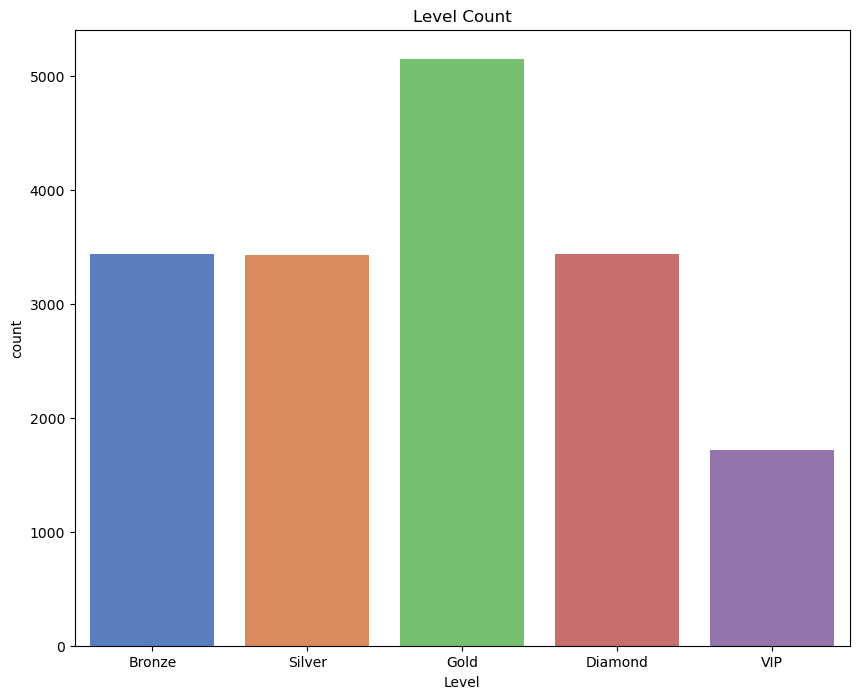

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
plt.subplots(figsize=(10, 8))
sns.countplot(x = 'Level', data=df, palette='muted', order=order)
plt.title('Level Count')
plt.show()

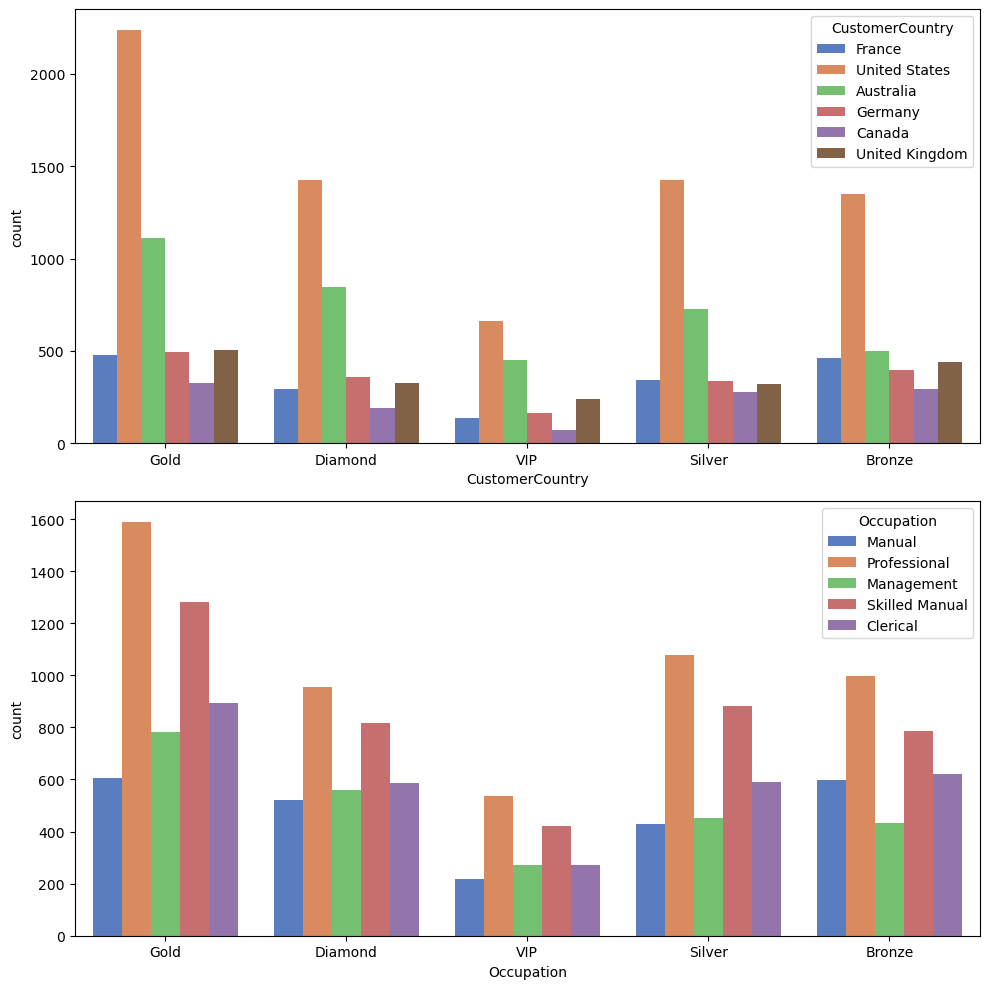

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for i, col in enumerate(['CustomerCountry', 'Occupation']):
    sns.countplot(ax=axes[i], x='Level', data=df, hue=col, palette='muted')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### 📌 분석 결과
- VIP등급을 제외한 회원들 중 미국에 거주하는 회원이 가장 많았습니다. 미국은 'Bronze', 'Silver', 'Gold', 'Diamond'등금의 회원들이 주로 거주하는 지역으로 나타났다.
- 호주는 모든 등급에서 두번쨰로 많은 회원이 거주하는 지역입니다. 특히 'VIP' 등급의 회원들이 가장 많이 거주하는 지역으로 나타났다.
- 전문직(Professional)은 모든 등급에서 가장 많은 직업 군이다. 모든 등급에서 전문직이 가장 많은 걸로 나타났다.
- 다음으로는 기술직(Skilled Manual)이 많이 나타났다. 기술직도 모든 등급에서 두 번째로 많은 직업군이다.
- 생상직은 모든 등급에서 가장 적은 비율로 나타났다. 모든 등급에서 회원들 중 생산직인 회원수가 가장 적다.

#### 🔴 결과 
- 미국에서 자전거 관련 스포츠에 관심이 많다고 예측할 수 있다.
- 전문직이 자전거 관련 스포트에 관심이 많다고 예측할 수 있다.

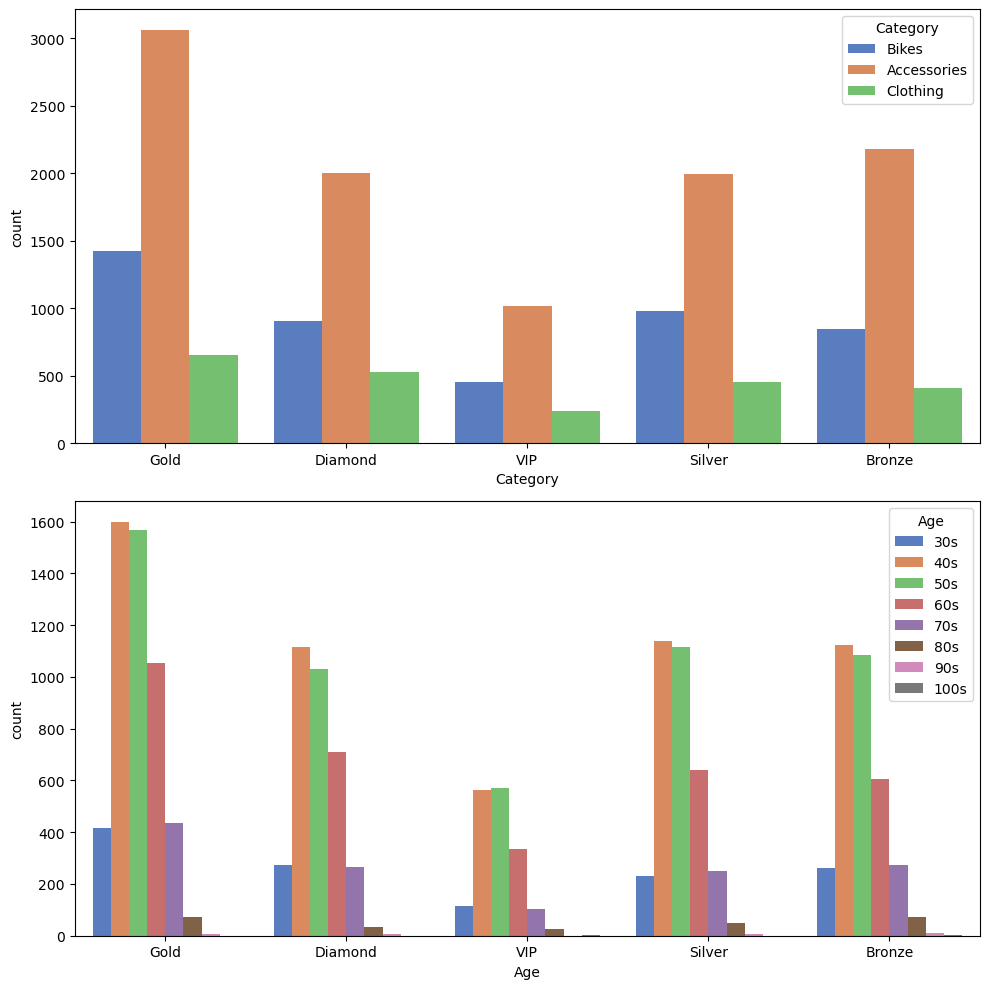

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for i, col in enumerate(['Category', 'Age']):
    sns.countplot(ax=axes[i], x='Level', data=df, hue=col, palette='muted')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### 📌 등급별 카테고리 분석
- 모든 등급에서 부속품의 구매율이 높다.
- 실버등급을 제외하면 모든 등급에서 옷 구매율이 가장 낮다.
- 모든 등금에서 40대, 50대에서 높은 구매율을 보여주었다.
- 모든 등급에서 다음으로는 60대가 높은 구매율을 보여주었다.

#### 🔴 결과
- 자전거 관련 스포츠에는 부속품이 수요가 가장 많다고 할수 있다.
- 자전거 관련 스포츠에는 옷의 중요도가 낮다고 예측해 볼 수 있다.
- 건강을 중요시 생각하는 40대 50대 60대가 자전거 관련 스포츠에 관심이 많다고 예측해 볼 수 있다.

#### 가설 
- 비중이 높은 국가들은 비중이 높은 직업군이 비중이 높을 것이다.
- 비중이 높은 직업군은 비중이 높은 나이대가 비중이 높을 것이다.

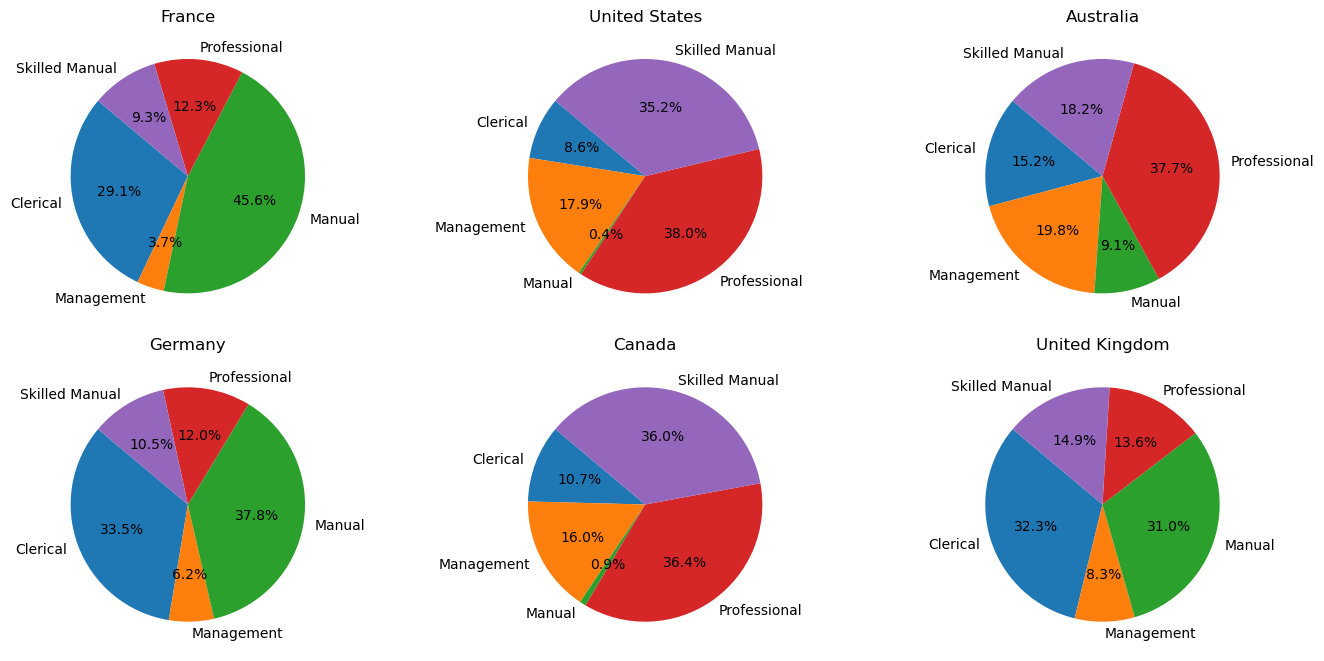

In [39]:
occupation_counts = df.groupby(['CustomerCountry', 'Occupation']).size().reset_index(name='Count')

plt.figure(figsize=(14, 10))
countries = df['CustomerCountry'].unique()
num_countries = len(countries)

for i, country in enumerate(countries):
    country_data = occupation_counts[occupation_counts['CustomerCountry'] == country]
    plt.subplot((num_countries // 3) + 1, 3, i + 1)
    plt.pie(country_data['Count'], labels=country_data['Occupation'], autopct='%1.1f%%', startangle=140)
    plt.title(country)

plt.tight_layout()
plt.show()

C:\Users\qortl\AppData\Local\Temp\ipykernel_28996\1527045021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_age_counts = df.groupby(['Occupation', 'Age']).size().reset_index(name='Count')


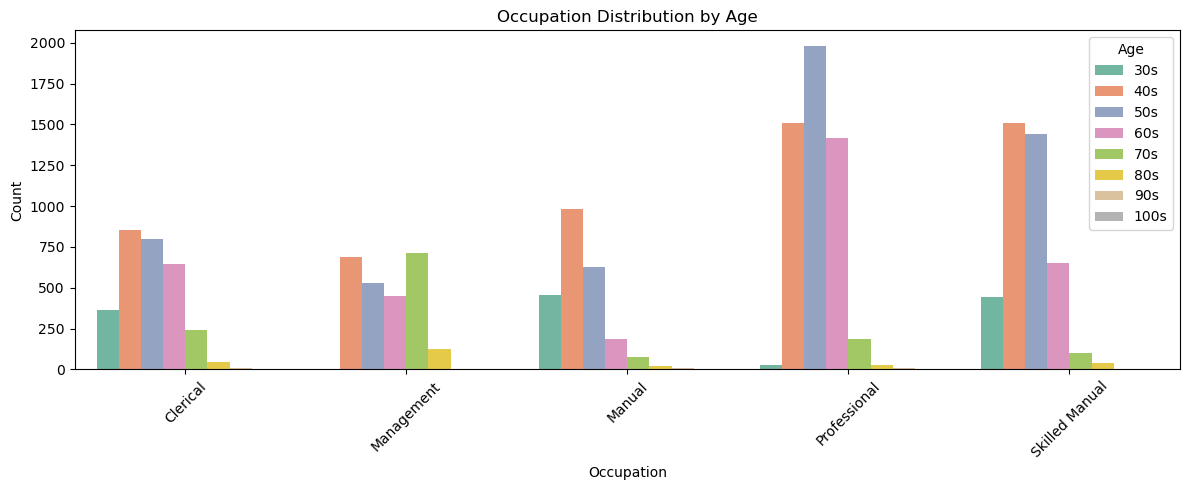

In [40]:
occupation_age_counts = df.groupby(['Occupation', 'Age']).size().reset_index(name='Count')

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x='Occupation', y='Count', hue='Age', data=occupation_age_counts, palette='Set2')
plt.title('Occupation Distribution by Age')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 비중이 높았던 미국과 호주가 비중이 높았던 직업군인 전문직과 기술직이 많았지만 비중이 가장 적었던 캐나다도 전문직과 기술직의 비중이 높았다.
- 비중이 높았던 전문직과 기술직이 비중이 높았던 40대, 50대, 60대의 비중이 높았다.

#### 🔴 결과
- 자전거 관련 스포츠는 국가보다는 직업군과 나이대를 타켓팅 하는 것이 좋아보인다.

#### ❓ 가설
- 구매가 활발한 40대 50대 60대는 소득이 높을 것이다.

In [41]:
o_df = df.groupby('Occupation')['YearlyIncome'].mean().reset_index(name='MeanIncome')
o_df


,Occupation,MeanIncome
0,Clerical,29766.970618
1,Management,91644.657863
2,Manual,16561.181435
3,Professional,72984.090027
4,Skilled Manual,52562.082139


C:\Users\qortl\AppData\Local\Temp\ipykernel_28996\1548820041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='YearlyIncome', data=df, palette='Set2', showfliers=False)


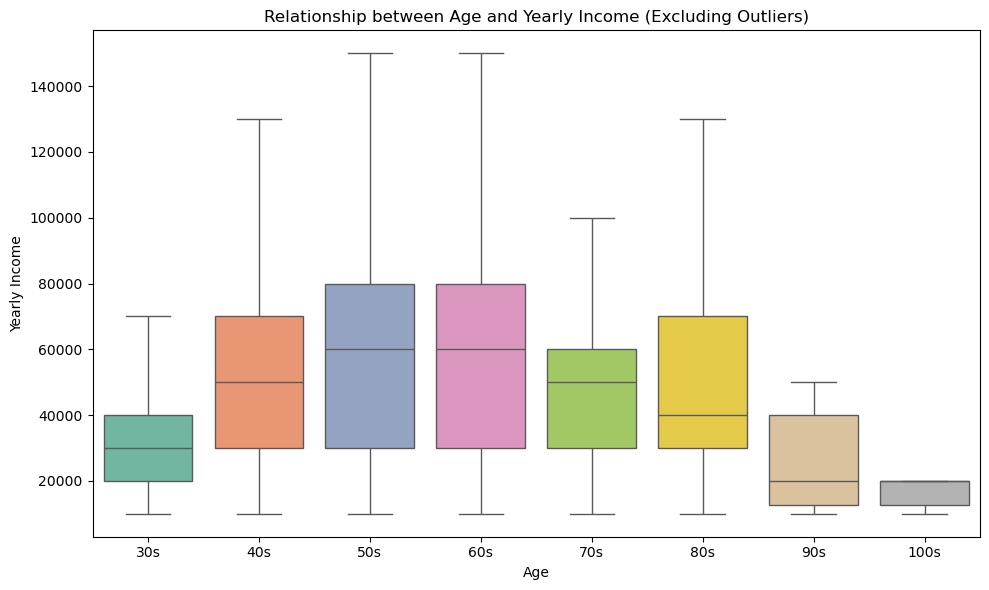

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='YearlyIncome', data=df, palette='Set2', showfliers=False)
plt.title('Relationship between Age and Yearly Income (Excluding Outliers)')
plt.xlabel('Age')
plt.ylabel('Yearly Income')
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 40대, 50대, 60대 모두 평균 연봉이 높은 것으로 나타났다.

#### 🔴 결론
- 자전거 관련 마켓은 나이대가 가장 중요하다.
- 특정 나이대를 타겟으로한 마케팅이 필요하다.
- 주요 고객층의 평균 연봉이 높으므로 가격에 대한 민감도는 낮을 것이다.


### 📝마케팅 전략

#### 1️⃣ 등급 타겟팅
- vip만 얻을 수 있는 자전거 상품을 제작해 VIP등급 달성 고객에게 제공
- 신제품의 경우 VIP고객에게 우선 구매권을 부여

#### 2️⃣이벤트
- 자전거 대회 등과 같은 이벤트를 개최해 기존 고객층이 자전거에 대한 흥미를 잃지 않게 유지
- 자전거를 많이 타는 시즌에는 대규모 할인 이벤트를 진해하여 고객층 확보
- 고가, 고품질의 다양한 상품군을 구성하고 이를 체험할 수 있는 이벤트 개최

#### 3️⃣ 홍보
- 40대, 50대, 60대 고객들을 타겟팅하여 건강 관련 캠페인을 개최
- 건강 관련 미디어에 의사와 같은 신뢰가 높은 직업군을 초청해 자전거와 건강의 연관성을 홍보